In [15]:
import pandas as pd
churn_csv = "WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(churn_csv)

In [28]:
# remove customerID
df2 = df.drop(columns=["customerID"])

# replace the "no-internet-service" and "no-phone-service" with NaN
df2.replace(["No phone service", "No internet service", " "],[pd.NA, pd.NA, pd.NA], inplace=True)

# split columns like gender and internet service so that we can test the corelation, 
# and replace Yes wiht 1 and no with 0
df2 = pd.get_dummies(df2, columns=["gender", "InternetService", "Contract", "PaymentMethod"])

df2.replace(["Yes", "No"], [1, 0], inplace=True)

# normalize the data and convert str to float where needed
df2["TotalCharges"] = df2["TotalCharges"].dropna().astype(float)

normalized_df = df2

# removes each row with na value
normalized_df.dropna(inplace=True)

# normalizes the values of each column and replaces the values 
# of old column with values of the new column
for column in normalized_df:
    values = normalized_df.loc[:, column]
    max_value = max(values)
    if column == "InternetService_No":
        continue
    values = [value/max_value for value in values]
    normalized_df.loc[:, column] = values

/tmp/ipykernel_319632/377987156.py:29: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  normalized_df.loc[:, column] = values


In [31]:
from sklearn.model_selection import train_test_split
y = normalized_df['Churn']
x = normalized_df.drop(columns='Churn')

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [32]:
# part 1
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC, SVC

models = [LogisticRegressionCV(n_jobs=-1), LinearSVC(), SVC()]

for model in models:
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    print(f'{model} scored: {score}')

LogisticRegressionCV(n_jobs=-1) scored: 0.765728476821192
LinearSVC() scored: 0.765728476821192
SVC() scored: 0.7516556291390728


In [34]:
# part 2
from time import time

for model in models:
    start = time()
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    total = time()-start
    print(f'{model} scored: {score} \n time in seconds: {total} \n')

LogisticRegressionCV(n_jobs=-1) scored: 0.765728476821192 
 time in seconds:0.4973926544189453 

LinearSVC() scored: 0.765728476821192 
 time in seconds:0.09876704216003418 

SVC() scored: 0.7516556291390728 
 time in seconds:0.4855837821960449 



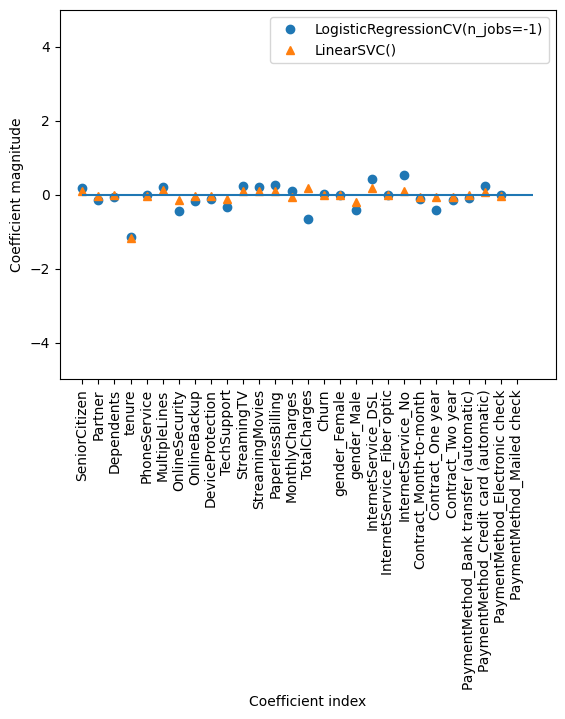

In [42]:
import matplotlib.pyplot as plt

plt.plot(models[0].coef_.T, 'o', label=models[0])
plt.plot(models[1].coef_.T, '^', label=models[1])
plt.xticks(range(normalized_df.shape[1]), normalized_df.columns, rotation=90)
plt.hlines(0, 0, normalized_df.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Part 3

from oure analysis we see the training times and precission of each model, if we look at oure chart we also see how much importance oure estimators put on different features of the data. from oure chart we can tell that linear svc is more "conservative" when it comes to weighting different features, which means that it would generalize well, so even if it turns our a feature is much more important when looking at more data, linearSVC would not be that imprecises as it did not putt a lot of importance on anny specific feature of the data compared to LogisticRegression. linearSVC is one of the two fastest models to train leading me to conclude that linearSVC would be the best estimator for a data set of 1.000.000 data points.